# Case 1. Heart Disease Classification
Mika Paavola
5.2.2019
Helsinki Metropolia University of Applied Sciences

# Background
This document is done in Cognitive Systems for Health Technology Applications course. The aim of this assigment was to learn neural networks and learn test model architectures, solver optimizer, and training settings. Also learn how to use matplotlib tools to make graphical presentations.

# Data
Database includes heart disease diagnosis with numerical values from 0 to 4, data is collected from Cleveland Clinic Foundation. Icludes 303 instances and 14 Attributes (total 76). Database has several missing attributes 

## Import libraries and import data set from url 

In [1]:
%pylab inline
import time
import pandas as pd
import numpy as np


from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from keras.utils import to_categorical
from keras import models, layers

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## Data description and preprocessing

In [2]:
#URL for dataframe
url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, sep =',', header = None, index_col = None, na_values = '?')

#Data description and preprocessing

#column names from dataset
names_list = ['age','sex','cp','trestbps','chol','fbs','restecg','thalac','exang','oldpeak','slope','ca','thal','num']
df.columns = names_list

# Filling missing data with median values
df = df.fillna(df.median())

# Randomize rows
df = shuffle(df)
df.describe()

# Select the data (input) columns
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg','thalac','exang','oldpeak','slope','ca','thal']
data = df[data_list]

# Scale the data
data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)

# Check descriptive statistics of normalized data
data_norm.describe()

# Select labels (output)
labels = df['num']

# Modeling and compilation

Here i use matplotlib to plot histogram about severity of disease from -0.5 to 4.5
Then i split dataset to training data and validation data where training data is  0 to 200 and validation is rest.
Next step i use Keras Sequential model which is stack of layers it's easy way to build constructor
Then i add three layers and its purpose is to make input shape clear
next layers activation 'sigmoid' turns output result between 0 to 1

Last thing was to compile model where i use 'adam' optimizer and 'categorical_crossentropy' loss function and 'accuracy' for monitoring accuracy during the training optimize helps to make sure theres not happening over load of inputs.


Description and code for the neural networks model(s) o How the training and testing were conducted (epoch, batch sizes, solver settings) o How much data was used for testing/validation purposes 

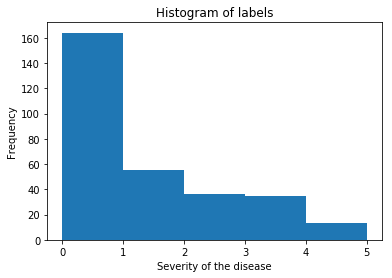

Shape of data and one hot labels: (303, 13) (303, 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 25)                350       
_________________________________________________________________
dense_42 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 80        
Total params: 820
Trainable params: 820
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Plot the histogram of the labels (severity of the disease)
plt.hist(labels, bins = [0, 1, 2, 3, 4, 5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
show()

#Labels to categorical output
one_hot_labels = to_categorical(labels)
one_hot_labels[:,:5]

#check the shapes of the normalized data and categorical output
print('Shape of data and one hot labels:', data_norm.shape, one_hot_labels.shape)

# Split the data and labels into training and validation sets
train_data = data_norm[:200]
val_data = data_norm[200:]

train_labels = one_hot_labels[:200]
val_labels = one_hot_labels[200:]

#build the model
model = models.Sequential()
model.add(layers.Dense(25, activation='sigmoid', input_shape=(13,)))
model.add(layers.Dense(15, activation='sigmoid'))
model.add(layers.Dense(5, activation='sigmoid'))
model.summary()

#compile thje model
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# fit the model with the data and keep record on elapsed time
t_strat = time.time()

# Training and Validation

model.fit fits the data to the data the i select samples and how many epochs i set one epoch means how many times it goes through the trainig data. then i set batch size which specify number of samples

then using matplotlib i visualize training loss and accuracy

Elapsed time: 2.12 seconds


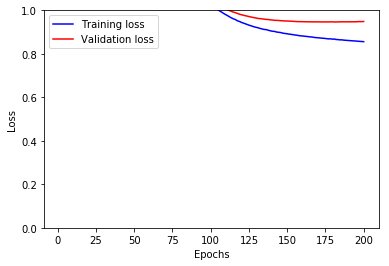

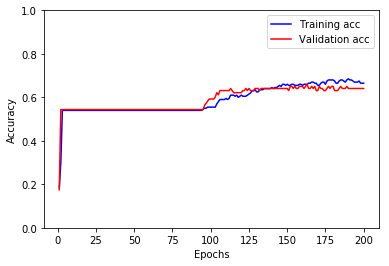

In [92]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(train_data, train_labels, 
                    epochs = 200, 
                    batch_size = 25, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Results and Discussion

Results, i print the confusion matric which shows correct predictions 
then precision which shows measure of classifier's exactness more higher is more accurate
then Recall which is a measure of a classifier’s completeness. The higher the recall, the more cases the classifier covers.


In [93]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(data_norm)
y_pred = argmax(val_predicts, axis = 1)
cm = confusion_matrix(labels, y_pred)

# Best guess = Guess that all are normal
# ==> Normal cases are correctly classified
# Normal cases can be counted by summing all labels that are zeros
print('Best guess: {:.4f}'.format(np.sum(labels == 0)/len(labels)))

# Accuracy can be calculated from the confusion matrix by
# counting all elements in diagonal (=trace of the matrix)
print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
print('Confusion matrix:')
print(cm)

# Calculate precision, recall, fscore and support
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(labels, y_pred)

# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support:', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Best guess: 0.5413
Total accuracy: 0.6568
Confusion matrix:
[[155   4   2   3   0]
 [ 28  15   1  11   0]
 [  8   4   8  16   0]
 [  2   8   4  21   0]
 [  0   4   0   9   0]]
Support: [164  55  36  35  13]
Precision: [ 0.803  0.429  0.533  0.350  0.000]
Recall:    [ 0.945  0.273  0.222  0.600  0.000]
F-score:   [ 0.868  0.333  0.314  0.442  0.000]


# Conclusions


at the end accuracy shows how many times the model gives right diagnose and accuracy is about 65%
confusion matrix shows perfomance of algorithm.